Bộ dữ liệu load_breast_cancer

Bộ dữ liệu load_breast_cancer là một bộ dữ liệu được sử dụng rộng rãi trong học máy cho bài toán phân loại ung thư vú.
Bộ dữ liệu này bao gồm 569 mẫu, mỗi mẫu có 30 đặc trưng. Các đặc trưng này bao gồm các thông tin về kích thước, hình dạng và cấu trúc của các tế bào ung thư. Mục tiêu của bài toán là dự đoán xem một mẫu là lành tính (benign) hay ác tính (malignant).
Bộ dữ liệu load_breast_cancer có thể được tải xuống bằng cách sử dụng hàm load_breast_cancer() của thư viện scikit-learn. Hàm này trả về một đối tượng bunch() chứa các dữ liệu của bộ dữ liệu.

Về bộ dữ liệu load_breast_cancer

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

feature_names = data.feature_names 
target_names = data.target_names
print(feature_names)
print(target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [25]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

for i in range(5):
    features_formatted = ';'.join([f'{x:.2f}' for x in X[i]])
    print(f"Đặc trưng: {features_formatted}; Nhãn: {y[i]}")


Đặc trưng: 17.99;10.38;122.80;1001.00;0.12;0.28;0.30;0.15;0.24;0.08;1.09;0.91;8.59;153.40;0.01;0.05;0.05;0.02;0.03;0.01;25.38;17.33;184.60;2019.00;0.16;0.67;0.71;0.27;0.46;0.12; Nhãn: 0
Đặc trưng: 20.57;17.77;132.90;1326.00;0.08;0.08;0.09;0.07;0.18;0.06;0.54;0.73;3.40;74.08;0.01;0.01;0.02;0.01;0.01;0.00;24.99;23.41;158.80;1956.00;0.12;0.19;0.24;0.19;0.28;0.09; Nhãn: 0
Đặc trưng: 19.69;21.25;130.00;1203.00;0.11;0.16;0.20;0.13;0.21;0.06;0.75;0.79;4.58;94.03;0.01;0.04;0.04;0.02;0.02;0.00;23.57;25.53;152.50;1709.00;0.14;0.42;0.45;0.24;0.36;0.09; Nhãn: 0
Đặc trưng: 11.42;20.38;77.58;386.10;0.14;0.28;0.24;0.11;0.26;0.10;0.50;1.16;3.44;27.23;0.01;0.07;0.06;0.02;0.06;0.01;14.91;26.50;98.87;567.70;0.21;0.87;0.69;0.26;0.66;0.17; Nhãn: 0
Đặc trưng: 20.29;14.34;135.10;1297.00;0.10;0.13;0.20;0.10;0.18;0.06;0.76;0.78;5.44;94.44;0.01;0.02;0.06;0.02;0.02;0.01;22.54;16.67;152.20;1575.00;0.14;0.20;0.40;0.16;0.24;0.08; Nhãn: 0


Đối với phân lớp tuyến tính

Best hyperparameters: {'C': 0.5}
Độ chính xác trung bình sử dụng cross-validation với siêu tham số tốt nhất: 0.8805154479118149


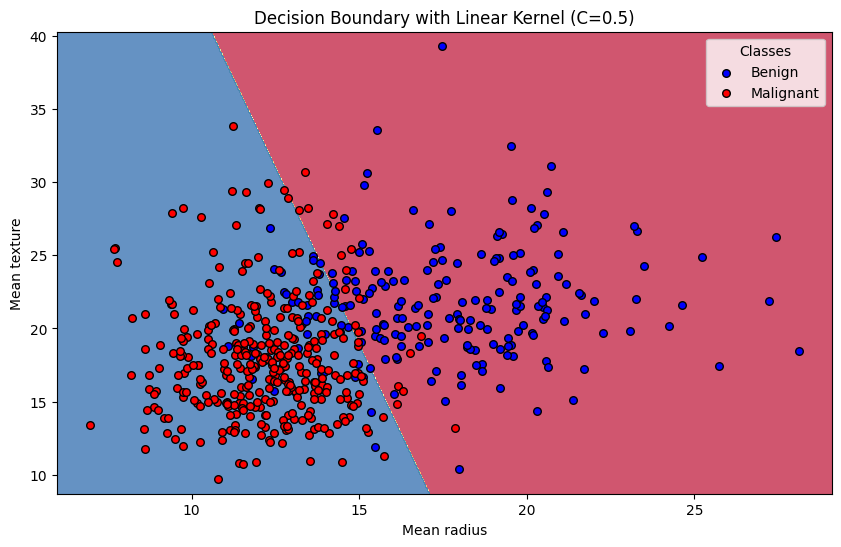

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data[:, :2] 
y = cancer.target

param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
}

svm_linear = SVC(kernel='linear')

grid_search_linear = GridSearchCV(svm_linear, param_grid, cv=5, scoring='accuracy')

grid_search_linear.fit(X, y)

best_params = grid_search_linear.best_params_

best_svm_linear = SVC(kernel='linear', C=best_params['C'])

best_svm_linear.fit(X, y)

cross_val_accuracy = np.mean(cross_val_score(best_svm_linear, X, y, cv=5))

print("Best hyperparameters:", best_params)
print("Độ chính xác trung bình sử dụng cross-validation với siêu tham số tốt nhất:", cross_val_accuracy)

# Predict on the meshgrid
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = best_svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Scatter plot for the data
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', edgecolors='k', marker='o', s=30, label='Benign')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', edgecolors='k', marker='o', s=30, label='Malignant')

plt.legend(title="Classes")
plt.title('Decision Boundary with Linear Kernel (C={})'.format(best_params['C']))
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.show()

Đối với phân lớp đa thức

Best hyperparameters: {'C': 1, 'degree': 2}
Độ chính xác trung bình sử dụng cross-validation với siêu tham số tốt nhất: 0.8980903586399627


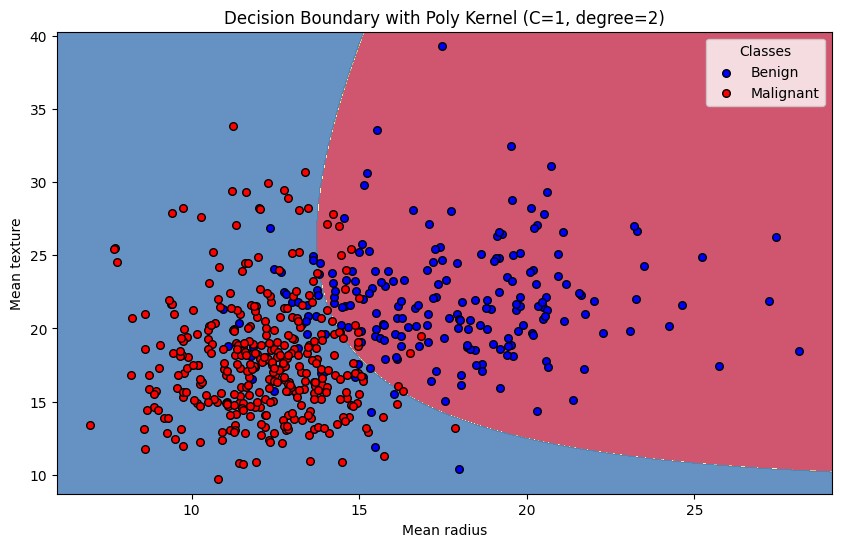

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data[:, :2]  
y = cancer.target

param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'degree': [2, 3, 4, 5]
}

svm_poly = SVC(kernel='poly')

grid_search_poly = GridSearchCV(svm_poly, param_grid, cv=5, scoring='accuracy')

grid_search_poly.fit(X, y)

best_params = grid_search_poly.best_params_

best_svm_poly = SVC(kernel='poly', C=best_params['C'], degree=best_params['degree'])

best_svm_poly.fit(X, y)

cross_val_accuracy = np.mean(cross_val_score(best_svm_poly, X, y, cv=5))

print("Best hyperparameters:", best_params)
print("Độ chính xác trung bình sử dụng cross-validation với siêu tham số tốt nhất:", cross_val_accuracy)

# Predict on the meshgrid
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = best_svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Scatter plot for the data
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', edgecolors='k', marker='o', s=30, label='Benign')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', edgecolors='k', marker='o', s=30, label='Malignant')

plt.legend(title="Classes")
plt.title('Decision Boundary with Poly Kernel (C={}, degree={})'.format(best_params['C'], best_params['degree']))
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.show()

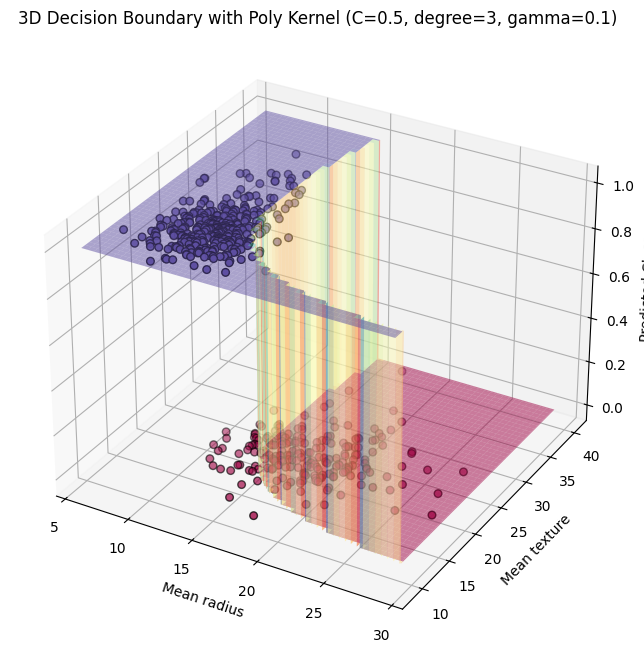

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

svm_poly = SVC(kernel='poly', C=1, degree=2)
svm_poly.fit(X, y)

# Create a meshgrid for 3D visualization
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot decision surface
ax.plot_surface(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)

# Scatter plot for the data
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.Spectral, edgecolors='k', marker='o', s=30)

ax.set_xlabel('Mean radius')
ax.set_ylabel('Mean texture')
ax.set_zlabel('Predicted Class')

plt.title('3D Decision Boundary with Poly Kernel (C=0.5, degree=3, gamma=0.1)')
plt.show()

Đối với phân lớp rbf

Best hyperparameters: {'C': 0.5, 'gamma': 0.1}
Độ chính xác trung bình sử dụng cross-validation với siêu tham số tốt nhất: 0.8980748331004502


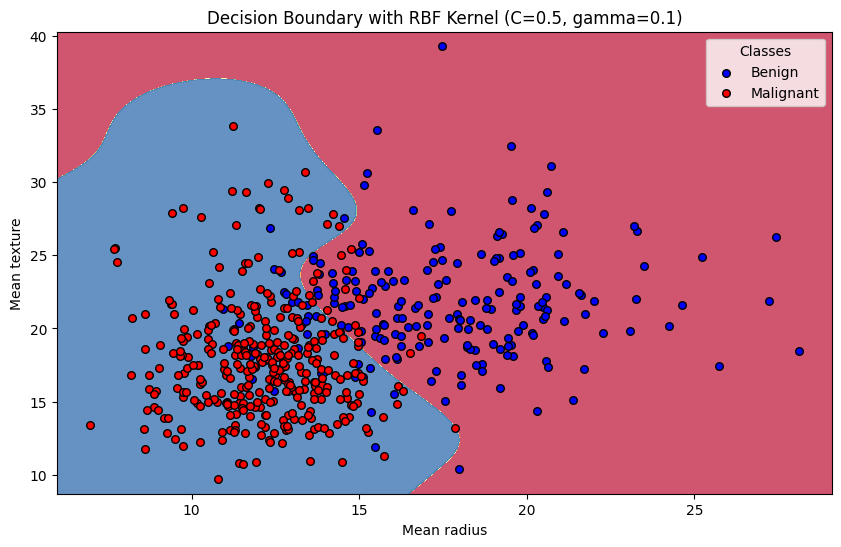

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data[:, :2] 
y = cancer.target

param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'gamma': [0.1, 0.5, 1, 5, 10]
}

svm_rbf = SVC(kernel='rbf')

grid_search_rbf = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')

grid_search_rbf.fit(X, y)

best_params = grid_search_rbf.best_params_

best_svm_rbf = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])

best_svm_rbf.fit(X, y)

cross_val_accuracy = np.mean(cross_val_score(best_svm_rbf, X, y, cv=5))

print("Best hyperparameters:", best_params)
print("Độ chính xác trung bình sử dụng cross-validation với siêu tham số tốt nhất:", cross_val_accuracy)

# Predict on the meshgrid
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = best_svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Scatter plot for the data
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', edgecolors='k', marker='o', s=30, label='Benign')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', edgecolors='k', marker='o', s=30, label='Malignant')

plt.legend(title="Classes")
plt.title('Decision Boundary with RBF Kernel (C={}, gamma={})'.format(best_params['C'], best_params['gamma']))
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.show()


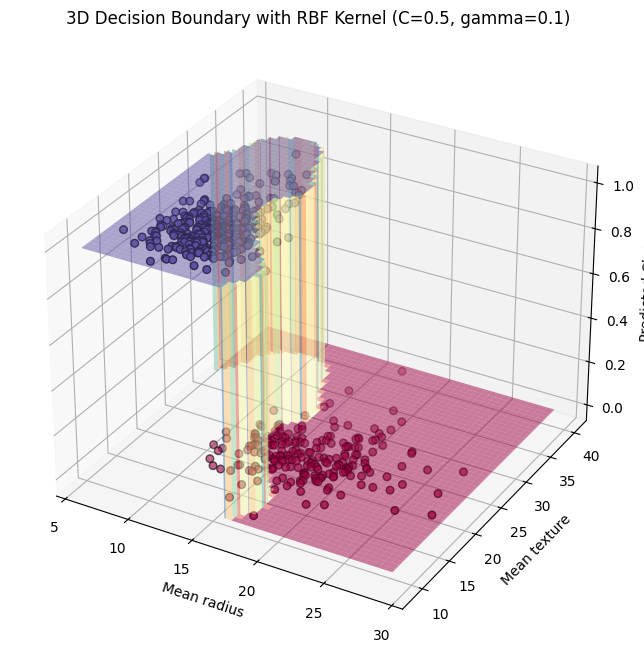

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

cancer = load_breast_cancer()
X = cancer.data[:, :2] 
y = cancer.target

svm_rbf = SVC(kernel='rbf', C=0.5, gamma=0.1)
svm_rbf.fit(X, y)

# Create a meshgrid for 3D visualization
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot decision surface
ax.plot_surface(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)

# Scatter plot for the data
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.Spectral, edgecolors='k', marker='o', s=30)

ax.set_xlabel('Mean radius')
ax.set_ylabel('Mean texture')
ax.set_zlabel('Predicted Class')

plt.title('3D Decision Boundary with RBF Kernel (C=0.5, gamma=0.1)')
plt.show()

Best hyperparameters for Sigmoid Kernel: {'C': 0.1, 'gamma': 0.1}
Độ chính xác trung bình sử dụng cross-validation với siêu tham số tốt nhất: 0.6274181027790716


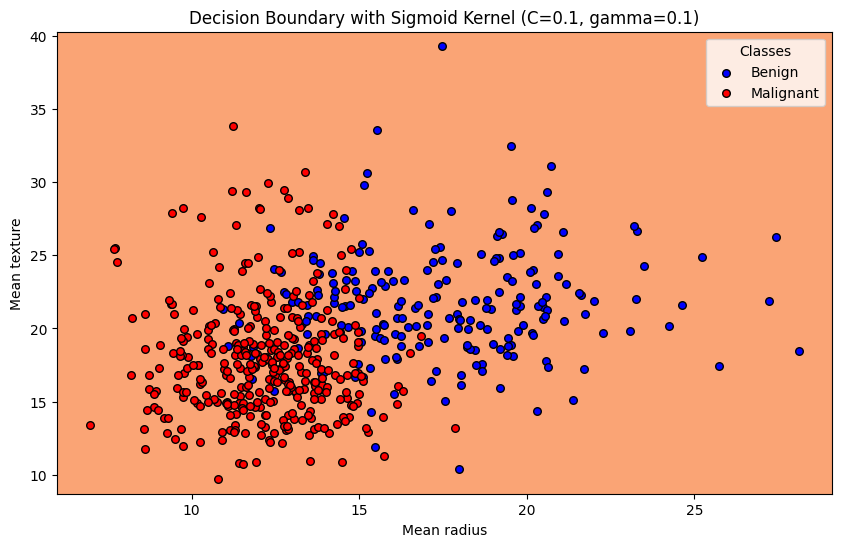

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data[:, :2] 
y = cancer.target

param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'gamma': [0.1, 0.5, 1, 5, 10]
}

svm_sigmoid = SVC(kernel='sigmoid')

grid_search_sigmoid = GridSearchCV(svm_sigmoid, param_grid, cv=5, scoring='accuracy')

grid_search_sigmoid.fit(X, y)

best_params_sigmoid = grid_search_sigmoid.best_params_

best_svm_sigmoid = SVC(kernel='sigmoid', C=best_params_sigmoid['C'], gamma=best_params_sigmoid['gamma'])

best_svm_sigmoid.fit(X, y)

cross_val_accuracy_sigmoid = np.mean(cross_val_score(best_svm_sigmoid, X, y, cv=5))

print("Best hyperparameters for Sigmoid Kernel:", best_params_sigmoid)
print("Độ chính xác trung bình sử dụng cross-validation với siêu tham số tốt nhất:", cross_val_accuracy_sigmoid)

# Predict on the meshgrid
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = best_svm_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Scatter plot for the data
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', edgecolors='k', marker='o', s=30, label='Benign')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', edgecolors='k', marker='o', s=30, label='Malignant')

plt.legend(title="Classes")
plt.title('Decision Boundary with Sigmoid Kernel (C={}, gamma={})'.format(best_params_sigmoid['C'], best_params_sigmoid['gamma']))
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.show()


Lựa chọn mô hình

Quyết định giữa việc sử dụng mô hình SVM với hạt nhân RBF hay hạt nhân Poly phụ thuộc vào nhiều yếu tố, bao gồm đặc điểm của dữ liệu và mục tiêu của ứng dụng. Ta cần lưu ý một vài yếu tố sau:

Hạt nhân RBF (Radial Basis Function):
Thường được sử dụng khi dữ liệu không tuyến tính và có phương sai cao.
Hoạt động tốt trong nhiều trường hợp, đặc biệt là khi không rõ ràng về đặc trưng của dữ liệu.

Hạt nhân Poly (Polynomial):
Thường được sử dụng khi có sự tuyến tính trong dữ liệu.
Độ dốc (degree) là một tham số quan trọng (ở đây ta đã chọn là 2)

Tuy nhiên, nếu cả hai đều có hiệu suất tương tự và không có sự chênh lệch đáng kể trong độ chính xác, ta có thể chọn mô hình một cách thoải mái và dễ hiểu nhất cho ứng dụng.

=> Trong trường hợp này ta chọn lõi rbf bởi sự linh hoạt của nó

Đưa mô hình vào model

In [16]:
import joblib
# Lưu mô hình vào một tệp sử dụng joblib
joblib.dump(svm_rbf, 'svm.joblib')

['svm.joblib']

Tạo giao diện đồ họa để dự đoán các điểm mới bằng Tkinter

In [1]:
from tkinter import *
import joblib

def clear_all():
    meanradius_field.delete(0, END)
    meantexture_field.delete(0, END)
    predict_field.delete(0, END)
    rate_field.delete(0, END)
    meanradius_field.focus_set()

def calculate_ci():
    try:
        meanradius = float(meanradius_field.get())
        meantexture = float(meantexture_field.get())

        loaded_svm_model = joblib.load('svm.joblib')

        if loaded_svm_model.predict([[meanradius, meantexture]]) == 0:
            prediction = 'Lành tính'
        else:
            prediction = 'Ác tính'

        predict_field.delete(0, END)
        predict_field.insert(0, prediction)

        accuracy_rate = 0.8980748331004502
        rate_field.delete(0, END)
        rate_field.insert(0, f"{accuracy_rate:.2%}")

    except Exception as e:
        print(f"Lỗi trong quá trình dự đoán: {e}")
        predict_field.delete(0, END)
        predict_field.insert(0, "Lỗi")

if __name__ == "__main__":

    root = Tk()
    root.configure(background='#E8F6F3')
    root.geometry("400x300")
    root.title("Dự đoán loại tế bào")

    label1 = Label(root, text=" Mean radius (10^-6 mm) ", fg='black', bg='#FF7575')
    label2 = Label(root, text="Mean texture : ", fg='black', bg='#FF7575')
    label4 = Label(root, text="Predict : ", fg='black', bg='#FF7575')
    label5 = Label(root, text="Rate : ", fg='black', bg='#FF7575')


    label1.grid(row=1, column=0, padx=10, pady=10)
    label2.grid(row=2, column=0, padx=10, pady=10)
    label4.grid(row=5, column=0, padx=10, pady=10)
    label5.grid(row=6, column=0, padx=10, pady=10)

    meanradius_field = Entry(root)
    meantexture_field = Entry(root)
    predict_field = Entry(root)
    rate_field = Entry(root)

    meanradius_field.grid(row=1, column=1, padx=10, pady=10)
    meantexture_field.grid(row=2, column=1, padx=10, pady=10)
    predict_field.grid(row=5, column=1, padx=10, pady=10)
    rate_field.grid(row=6, column=1, padx=10, pady=10)

    button1 = Button(root, text="Submit", bg='#FF7575', fg="black", command=calculate_ci)
    button2 = Button(root, text="Clear", bg='#FF7575', fg="black", command=clear_all)

    button1.grid(row=4, column=1, pady=10)
    button2.grid(row=7, column=1, pady=10)

    root.mainloop()
